In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, silhouette_score

In [2]:
# Load dataset
data = load_iris()
X = data.data
labels = data.target
feature_names = data.feature_names

In [3]:
# Normalisasi data agar clustering lebih baik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
# Hierarchical clustering (Agglomerative)
linked = linkage(X_scaled, method='ward')

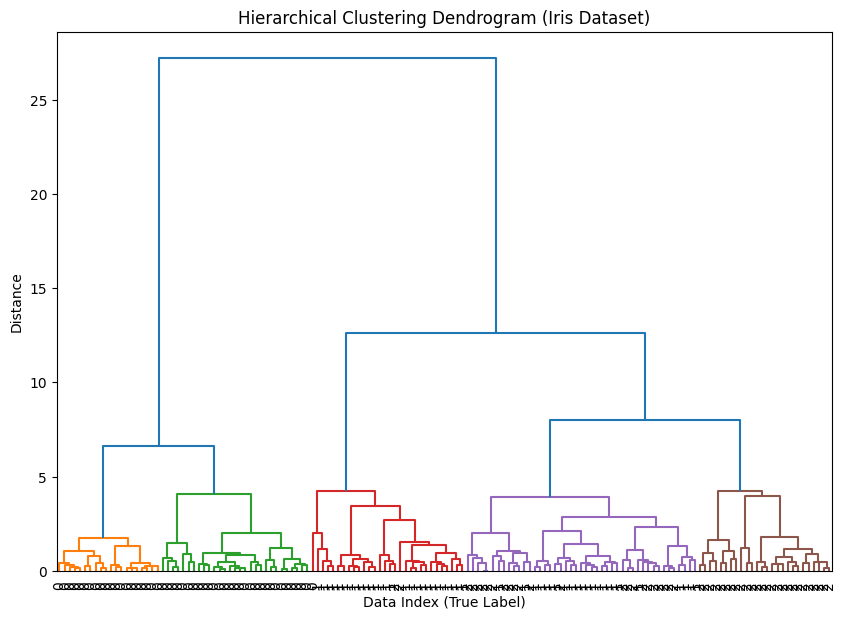

In [5]:
# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked,
           labels=labels,
           leaf_rotation=90,
           leaf_font_size=10,
           color_threshold=5)
plt.title('Hierarchical Clustering Dendrogram (Iris Dataset)')
plt.xlabel('Data Index (True Label)')
plt.ylabel('Distance')
plt.show()

In [6]:
# Membentuk cluster, misalnya 3 cluster
clusters = fcluster(linked, t=3, criterion='maxclust')

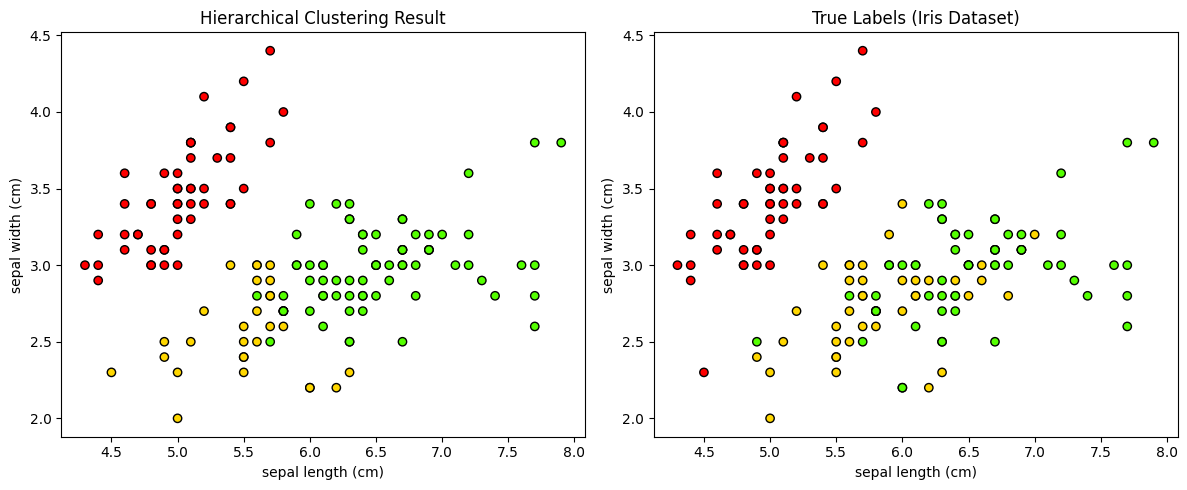

In [7]:
# Visualisasi hasil clustering
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='prism', edgecolor='k')
plt.title('Hierarchical Clustering Result')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='prism', edgecolor='k')
plt.title('True Labels (Iris Dataset)')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])

plt.tight_layout()
plt.show()

In [8]:
# --- Evaluasi hasil clustering ---
# Adjusted Rand Index
ari = adjusted_rand_score(labels, clusters)
print(f"Adjusted Rand Index (ARI): {ari:.3f}")

Adjusted Rand Index (ARI): 0.615


In [9]:
# Silhouette Score
sil_score = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score: {sil_score:.3f}")

Silhouette Score: 0.447
